In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_csv('FuelConsumptionCo2.csv') 

In [3]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 87.6+ KB


In [5]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
co2 = data['CO2EMISSIONS']
print(co2.max())
print(co2.min())
print(co2.std())

488
108
63.372304442800065


In [7]:
bins = (105,200,490) # 200 is our decision point. Greater than 200 means NOT SAFE and Less than 200 means SAFE
group_names = ['Safe','Not Safe']
data['CO2EMISSIONS'] = pd.cut(data['CO2EMISSIONS'], bins=bins,labels = group_names)
data['CO2EMISSIONS'].unique()

[Safe, Not Safe]
Categories (2, object): [Safe < Not Safe]

In [8]:
label_co2 = LabelEncoder()

In [9]:
data['CO2EMISSIONS'] = label_co2.fit_transform(data['CO2EMISSIONS'])

In [10]:
data['CO2EMISSIONS'].value_counts()

0    831
1    236
Name: CO2EMISSIONS, dtype: int64

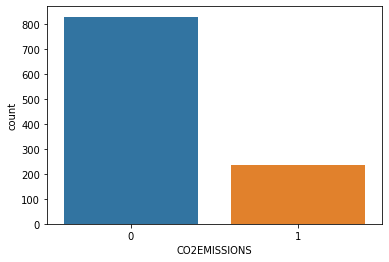

In [11]:
sns.countplot(data['CO2EMISSIONS'])

In [12]:
X = data.drop(['CO2EMISSIONS','MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE','MODELYEAR'], axis=1) 
y = data['CO2EMISSIONS']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [14]:
sc = StandardScaler()

In [15]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest Classifier

In [16]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [17]:
print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       161
           1       0.98      0.98      0.98        53

    accuracy                           0.99       214
   macro avg       0.99      0.99      0.99       214
weighted avg       0.99      0.99      0.99       214

[[160   1]
 [  1  52]]


# SVM Classifier

In [18]:
clf = svm.SVC()
clf.fit(X_train,y_train)
clf_pred = clf.predict(X_test)

In [19]:
print(classification_report(y_test, clf_pred))
print(confusion_matrix(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       161
           1       0.96      0.92      0.94        53

    accuracy                           0.97       214
   macro avg       0.97      0.96      0.96       214
weighted avg       0.97      0.97      0.97       214

[[159   2]
 [  4  49]]


# Neural Network

In [20]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
mlpc.fit(X_train,y_train)
mlpc_pred = mlpc.predict(X_test)

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
print(classification_report(y_test, mlpc_pred))
print(confusion_matrix(y_test, mlpc_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       161
           1       0.96      0.92      0.94        53

    accuracy                           0.97       214
   macro avg       0.97      0.96      0.96       214
weighted avg       0.97      0.97      0.97       214

[[159   2]
 [  4  49]]


In [22]:
from sklearn.metrics import accuracy_score

cm = accuracy_score(y_test, rfc_pred)
cm

0.9906542056074766

In [23]:
data.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,1
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,0
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,1
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,0
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,0
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,0
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,0
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,0
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,0
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,0


In [25]:
X_new = [[2.4,4,7,5.5,7.5,30]]
X_new = sc.transform(X_new) # Applying Standard Scalar
y_new = rfc.predict(X_new) # Predicting using Random Forest Classifier
y_new

array([1])